# SPAM

...

Summary:

- Prediction type: __Classification model__
- Domain: __SPAM__
- Prediction target: __Whether a message is a SPAM message__ 
- Population size: __...__

_Author: Dr. Patrick Urbanke_

# Background

...

### A web frontend for getML

The getML monitor is a frontend built to support your work with getML. The getML monitor displays information such as the imported data frames, trained pipelines and allows easy data and feature exploration. You can launch the getML monitor [here](http://localhost:1709).

### Where is this running?

Your getML live session is running inside a docker container on [mybinder.org](https://mybinder.org/), a service built by the Jupyter community and funded by Google Cloud, OVH, GESIS Notebooks and the Turing Institute. As it is a free service, this session will shut down after 10 minutes of inactivity.

# Analysis

Let's get started with the analysis and set up your session:

In [29]:
import copy
import csv
import os
from urllib import request
import zipfile

import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline  

from sklearn.feature_extraction.text import CountVectorizer

import getml

getml.engine.set_project('spam')


Connected to project 'spam'


Tuning is effective at improving our results, but it takes quite long, so we want to make it optional:

## 1. Loading data

### 1.1 Download from source

We begin by downloading the data from the source file:

In [30]:
fname = "smsspamcollection.zip"

if not os.path.exists(fname):
    fname, res = request.urlretrieve(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/" + fname, 
        fname
    )

with zipfile.ZipFile("smsspamcollection.zip", 'r') as zip_ref:
    zip_ref.extractall("SPAM")

### 1.2 Data preparation

The invoice dates are in a somewhat unusual format, fo we need to rectify that.

In [31]:
lines = open("SPAM/SMSSpamCollection", 'rt').read().split('\n')
targets = [line.split('\t')[0] for line in lines]
text = ['\t'.join(line.split('\t')[1:]) for line in lines]

In [32]:
count_vectorizer = CountVectorizer(
    min_df=11
)

In [33]:
count_vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=11,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
count_vectorizer.get_feature_names()

['000',
 '03',
 '04',
 '0800',
 '08000839402',
 '08000930705',
 '10',
 '100',
 '1000',
 '10p',
 '11',
 '12',
 '12hrs',
 '150',
 '150p',
 '150ppm',
 '16',
 '18',
 '1st',
 '20',
 '200',
 '2000',
 '2003',
 '250',
 '2lands',
 '2nd',
 '30',
 '350',
 '50',
 '500',
 '5000',
 '750',
 '800',
 '8007',
 '86688',
 '87066',
 'abiola',
 'able',
 'about',
 'abt',
 'ac',
 'account',
 'actually',
 'address',
 'aft',
 'after',
 'afternoon',
 'again',
 'age',
 'ago',
 'ah',
 'aight',
 'all',
 'almost',
 'alone',
 'already',
 'alright',
 'also',
 'always',
 'am',
 'amp',
 'an',
 'and',
 'angry',
 'another',
 'ans',
 'answer',
 'any',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'apply',
 'ard',
 'are',
 'area',
 'around',
 'as',
 'asap',
 'ask',
 'askd',
 'asked',
 'asking',
 'ass',
 'at',
 'attempt',
 'auction',
 'available',
 'await',
 'award',
 'awarded',
 'away',
 'awesome',
 'b4',
 'babe',
 'baby',
 'back',
 'bad',
 'balance',
 'bank',
 'bcoz',
 'be',
 'beautiful',
 'because',
 'bed',
 'been',
 'b

In [35]:
transformed = count_vectorizer.transform(text)
processed = count_vectorizer.inverse_transform(transformed)

In [36]:
join_keys = []
indices = []
words = []

for i, proc in enumerate(processed):
    join_keys += [i] * len(proc)
    indices += range(len(proc.tolist()))
    words += proc.tolist()

In [37]:
peripheral_pandas = pd.DataFrame()
peripheral_pandas["join_key"] = join_keys
peripheral_pandas["index"] = indices
peripheral_pandas["words"] = words

In [38]:
peripheral_pandas

,join_key,index,words
0,0,0,available
1,0,1,crazy
2,0,2,go
3,0,3,got
4,0,4,great
5,0,5,in
6,0,6,only
7,0,7,point
8,0,8,there
9,0,9,until


In [39]:
population_pandas = pd.DataFrame()
population_pandas["target"] = targets
population_pandas["join_key"] = range(len(targets))
population_pandas = population_pandas[:-1]

In [40]:
population_pandas

,target,join_key
0,ham,0
1,ham,1
2,spam,2
3,ham,3
4,ham,4
5,spam,5
6,ham,6
7,ham,7
8,spam,8
9,spam,9


### 1.3 Prepare data for getML

getML requires that we define *roles* for each of the columns.

In [41]:
population = getml.data.DataFrame.from_pandas(population_pandas, "population")
peripheral = getml.data.DataFrame.from_pandas(peripheral_pandas, "peripheral")

In [42]:
population["target"] = (population.target == "spam").as_num()

In [43]:
population.set_role("join_key", getml.data.roles.join_key)
population.set_role("target", getml.data.roles.target)
population

Name,join_key,target
Role,join_key,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
,...,...
5569,5569,1
5570,5570,0
5571,5571,0


In [44]:
peripheral.set_role("join_key", getml.data.roles.join_key)
peripheral.set_role("words", getml.data.roles.categorical)
peripheral.set_role("index", getml.data.roles.numerical)
peripheral.set_unit("index", "index")
peripheral

Name,join_key,words,index
Role,join_key,categorical,numerical
Unit,,,index
0,0,available,0
1,0,crazy,1
2,0,go,2
3,0,got,3
4,0,great,4
,...,...,...
57493,5572,week,18
57494,5573,its,0


The *StockCode* is a 5-digit code that uniquely defines a product. It is hierarchical, meaning that every digit has a meaning. We want to make use of that, so we assign a unit to the stock code, which we can reference in our preprocessors.

In [45]:
random = population.random()

is_training = (random < 0.8)
is_test = ~is_training

data_train = population.where("data_train", is_training)
data_test = population.where("data_test", is_test)

## 2. Predictive modelling

We loaded the data and defined the roles and units. Next, we create a getML pipeline for relational learning.

### 2.1 Define relational model

To get started with relational learning, we need to specify the data model.

In our case, there are two joins we are interested in: 

1) We want to take a look at all of the other orders on the same invoice.

2) We want to check out how often a certain customer has cancelled orders in the past. Here, we limit ourselves to the last 90 days. To avoid data leaks, we set a horizon of one day.

In [46]:
population_ph = getml.data.Placeholder('population')

peripheral_ph = getml.data.Placeholder('peripheral')

population_ph.join(
    peripheral_ph,
    join_key='join_key',
)

population_ph

placeholder   other placeholder   allow lagged targets   horizon   join keys used   ...   
population    peripheral          False                  0.0       join_key         ...   



other join keys used   other time stamps used   relationship   time stamps used   
join_key                                        many-to-many                      



other join keys used   upper time stamps used   
join_key

### 2.2 getML pipeline

<!-- #### 2.1.1  -->
__Set-up the feature learner & predictor__

...

In [47]:
relboost = getml.feature_learning.RelboostModel(
    num_features=20,
    num_subfeatures=20,
    loss_function=getml.feature_learning.loss_functions.CrossEntropyLoss,
    seed=4367,
    num_threads=1,
    max_depth=4
)

predictor = getml.predictors.XGBoostClassifier()

__Build the pipeline__

In [48]:
pipe = getml.pipeline.Pipeline(
    tags=['relboost'],
    population=population_ph,
    peripheral=[peripheral_ph, peripheral_ph2],
    feature_learners=[relboost],
    predictors=[predictor]
)

### 2.3 Model training

In [49]:
pipe.check(data_train, [peripheral, peripheral])

INFO [JOIN KEYS NOT FOUND]: When joining  data frame 'population' and  data frame 'peripheral' over 'join_key' and 'join_key', there are no corresponding entries for 0.488889% of entries in 'join_key' in ' data frame 'population''. You might want to double-check your join keys.


Checking data model...


In [50]:
pipe.fit(data_train, [peripheral, peripheral])

INFO [JOIN KEYS NOT FOUND]: When joining  data frame 'population' and  data frame 'peripheral' over 'join_key' and 'join_key', there are no corresponding entries for 0.488889% of entries in 'join_key' in ' data frame 'population''. You might want to double-check your join keys.


Checking data model...

Relboost: Training features...
[========================================] 100%

Relboost: Building features...
[========================================] 100%

XGBoost: Training as predictor...
[========================================] 100%

Trained pipeline.
Time taken: 0h:0m:6.021298



Pipeline(preprocessors=[], feature_learners=['RelboostModel'], 
         feature_selectors=[], include_categorical=False, 
         peripheral=['peripheral', 'peripheral'], population='population', 
         predictors=['XGBoostClassifier'], tags=['relboost'], 
         share_selected_features=0.5)

url: http://localhost:1709/#/getpipeline/spam/jvNWDB/0/

### 2.4 Model evaluation

In [51]:
in_sample = pipe.score(data_train, [peripheral, peripheral])

out_of_sample = pipe.score(data_test, [peripheral, peripheral])

pipe.scores


Relboost: Building features...
[========================================] 100%


Relboost: Building features...
[========================================] 100%



,date time,set used,target,accuracy,auc,cross entropy
0,2020-12-22 08:56:26,data_test,target,0.98883,0.98252,0.07505
1,2020-12-22 08:56:24,data_train,target,0.99978,0.99999,0.00158


Finally, we evaluate the tuned pipeline on the testing set:

### 2.6 Studying features

__Feature correlations__

We want to analyze how the features are correlated with the target variable.

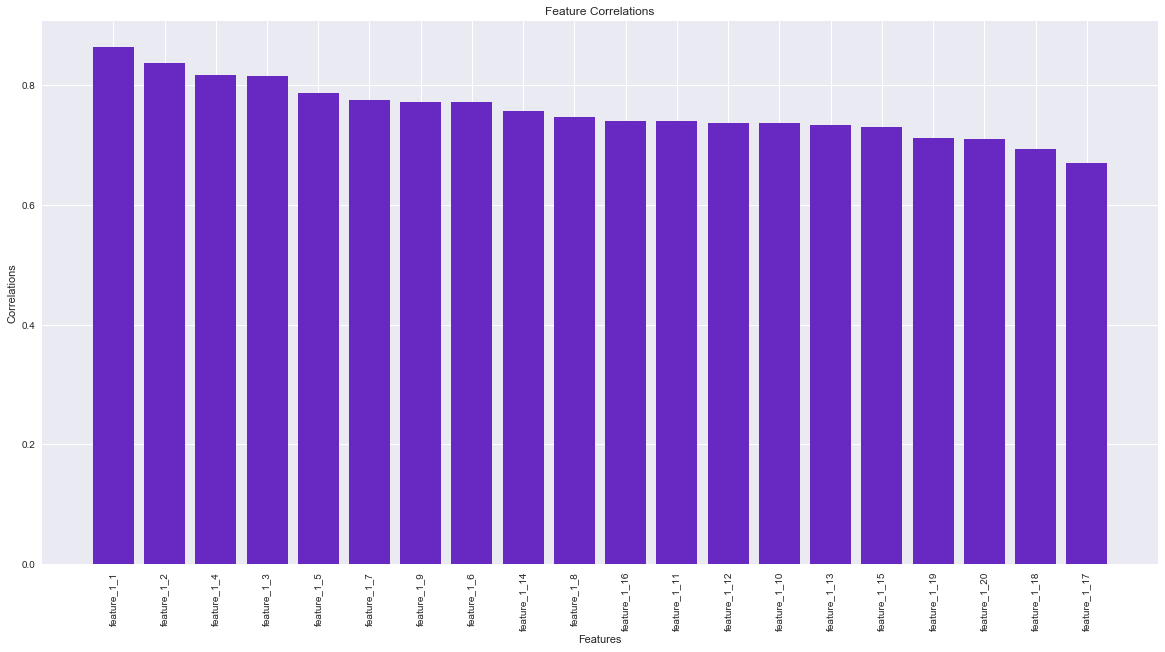

In [52]:
names, correlations = pipe.features.correlations()

plt.subplots(figsize=(20, 10))

plt.bar(names, correlations, color='#6829c2')

plt.title('Feature Correlations')
plt.xlabel('Features')
plt.ylabel('Correlations')
plt.xticks(rotation='vertical')
plt.show()

__Feature importances__
 
Feature importances are calculated by analyzing the improvement in predictive accuracy on each node of the trees in the XGBoost predictor. They are then normalized, so that all importances add up to 100%.

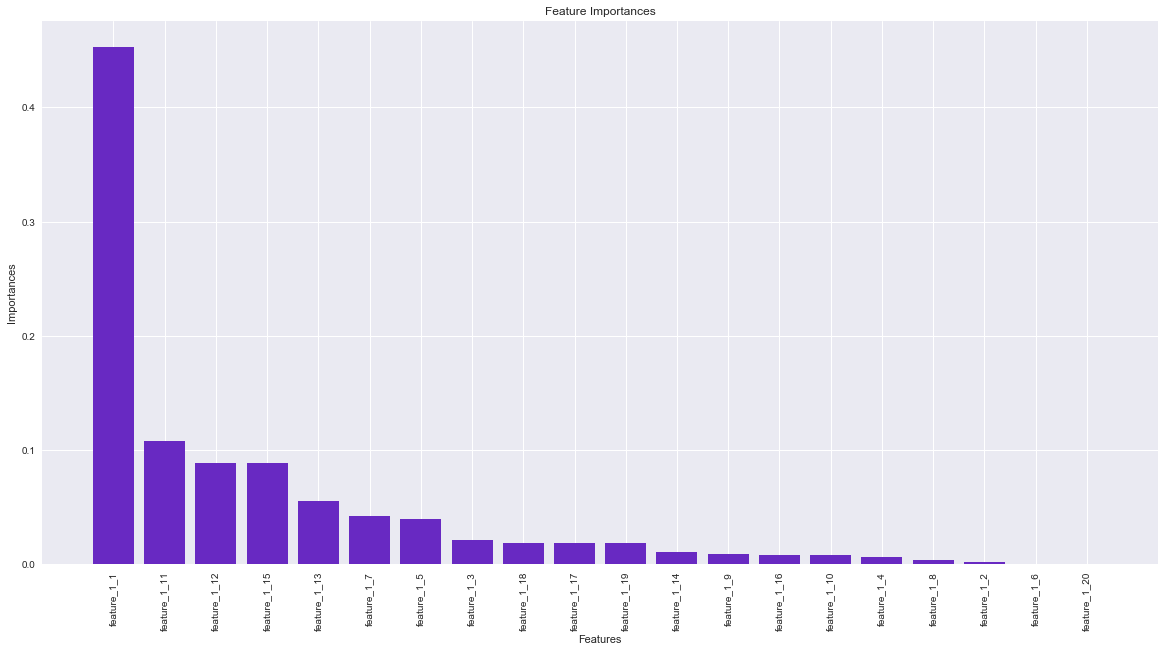

In [53]:
names, importances = pipe.features.importances()

plt.subplots(figsize=(20, 10))

plt.bar(names, importances, color='#6829c2')

plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.xticks(rotation='vertical')
plt.show()

most_important = names[0]

__Column importances__

Because getML uses relational learning, we can apply the principles we used to calculate the feature importances to individual columns as well.

As we can see, the *StockCode* contributes about 50% of the predictive accuracy.

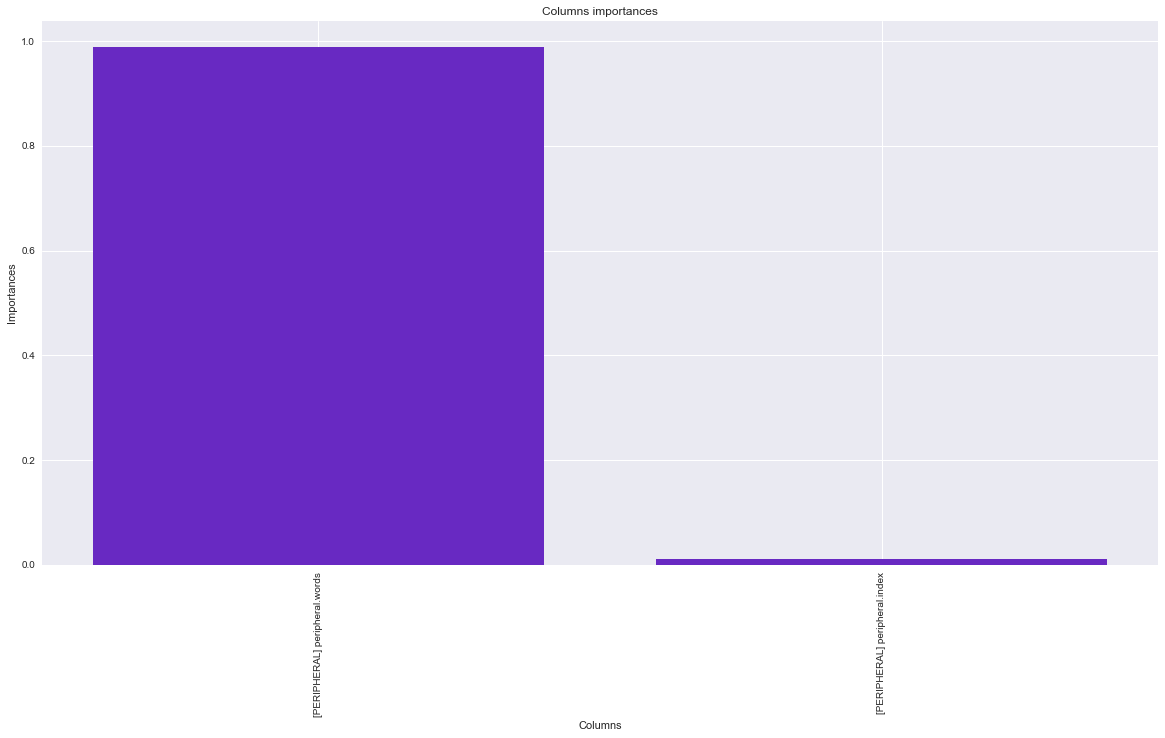

In [54]:
names, importances = pipe.columns.importances()

plt.subplots(figsize=(20, 10))

plt.bar(names, importances, color='#6829c2')

plt.title('Columns importances')
plt.xlabel('Columns')
plt.ylabel('Importances')
plt.xticks(rotation='vertical')
plt.show()

most_important = names[0]

__Transpiling the learned features__

We can also transpile the learned features to SQLite3 code. We want to show the two most important features. That is why we call the `.features.importances().` method again. The names that are returned are already sorted by importance.

In [55]:
names, _ = pipe.features.importances()

pipe.features.to_sql()[names[0]]

```sql
DROP TABLE IF EXISTS "FEATURE_1_1";

CREATE TABLE "FEATURE_1_1" AS
SELECT SUM( 
    CASE
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" IN ( 'available', 'world', 'lar', 'may', 'say', 'usf', 'it', 'still', 'brother', 'treat', 'friends', 'press', 'set', 'enough', 'home', 'soon', 'stuff', 'right', 'take', 'thank', 'times', 'wonderful', 'words', 'date', 'use', 'watching', 'eh', 'its', 'that', 'way', 'going', 'pay', 'alright', 'getting', 'always', 'bus', 'left', 'amp', 'll', 'what', 'doesn', 'wait', 'was', 'confirm', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'tomorrow', 'gt', 'hope', 'lt', 'didn', 'ask', 'maybe', 'telling', 'class', 'gets', 'best', 'never', 'sorry', 'thought', 'correct', 'meeting', 'move', 'pick', 'yourself', 'checking', 'frnds', 'which', 'dis', 'hee', 'finished', 'something', 'once', 'thats', 'after', 'job', 'ah', 'one', 'used', 'yo', 'wen', 'close', 'afternoon', 'means', 'smile', 'smiling', 'between', 'havent', 'cause', 'forgot', 'prob', 'run', 'driving', 'gone', 'test', 'life', 'making', 'aight', 'computer', 'anyway', 'friday', 'school', 'uncle', 'match', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'those', 'tired', 'open', 'taking', 'whats', 'wine', 'boy', 'missing', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'hmmm', 'ill', 'smoke', 'working', 'awesome', 'course', 'finally', 'able', 'hav', 'orchard', 'tmr', 'college', 'decimal', 'id', 'rs', 'sleeping', 'big', 'both', 'ready', 'break', 'semester', 'noe', 'sounds', 'few', 'march', 'side', 'reach', 'wil', 'tel', 'face', 'told', 'didnt', 'hold', 'angry', 'other', 'takes', 'plan', 'wana', 'full', 'swing', 'far', 'fone', 'shall', 'plz', 'shit', 'friendship', 'sister', 'lost', 'rest', 'problem', 'via', 'two', 'small', 'ever', 'chikku', 'talking', 'project', 'reason', 'slow', 'couple', 'leave', 'huh', 'put', 'god', 'india', 'stay', 'drink', 'head', 'ten', 'supposed', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'simple', 'frm', 'pretty', 'sea', 'mine', 'through', 'gym', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'na', 'grins', 'nobody', 'alone', 'gas', 'lei' ) ) AND ( t2."words" IN ( 'world', 'may', 'friends', 'set', 'stuff', 'times', 'words', 'way', 'going', 'alright', 'always', 'left', 'amp', 'doesn', 'confirm', 'abiola', 'pls', 'wanted', 'telling', 'sorry', 'move', 'pick', 'frnds', 'which', 'something', 'thats', 'after', 'ah', 'used', 'close', 'afternoon', 'run', 'driving', 'gone', 'test', 'making', 'friday', 'school', 'sending', 'him', 'mail', 'coz', 'lovable', 'open', 'taking', 'whats', 'missing', 'because', 'everyone', 'safe', 'hand', 'wit', 'smoke', 'course', 'able', 'hav', 'rs', 'few', 'march', 'side', 'reach', 'wil', 'face', 'didnt', 'hold', 'angry', 'takes', 'far', 'fone', 'plz', 'friendship', 'sister', 'rest', 'problem', 'two', 'ever', 'project', 'reason', 'slow', 'couple', 'india', 'drink', 'head', 'kind', 'details', 'monday', 'lose', 'sea', 'mine', 'through', 'yar', 'together', 'pub', 'anyone', 'wonder', 'lovely' ) ) THEN -0.5864562613615411
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" IN ( 'available', 'world', 'lar', 'may', 'say', 'usf', 'it', 'still', 'brother', 'treat', 'friends', 'press', 'set', 'enough', 'home', 'soon', 'stuff', 'right', 'take', 'thank', 'times', 'wonderful', 'words', 'date', 'use', 'watching', 'eh', 'its', 'that', 'way', 'going', 'pay', 'alright', 'getting', 'always', 'bus', 'left', 'amp', 'll', 'what', 'doesn', 'wait', 'was', 'confirm', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'tomorrow', 'gt', 'hope', 'lt', 'didn', 'ask', 'maybe', 'telling', 'class', 'gets', 'best', 'never', 'sorry', 'thought', 'correct', 'meeting', 'move', 'pick', 'yourself', 'checking', 'frnds', 'which', 'dis', 'hee', 'finished', 'something', 'once', 'thats', 'after', 'job', 'ah', 'one', 'used', 'yo', 'wen', 'close', 'afternoon', 'means', 'smile', 'smiling', 'between', 'havent', 'cause', 'forgot', 'prob', 'run', 'driving', 'gone', 'test', 'life', 'making', 'aight', 'computer', 'anyway', 'friday', 'school', 'uncle', 'match', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'those', 'tired', 'open', 'taking', 'whats', 'wine', 'boy', 'missing', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'hmmm', 'ill', 'smoke', 'working', 'awesome', 'course', 'finally', 'able', 'hav', 'orchard', 'tmr', 'college', 'decimal', 'id', 'rs', 'sleeping', 'big', 'both', 'ready', 'break', 'semester', 'noe', 'sounds', 'few', 'march', 'side', 'reach', 'wil', 'tel', 'face', 'told', 'didnt', 'hold', 'angry', 'other', 'takes', 'plan', 'wana', 'full', 'swing', 'far', 'fone', 'shall', 'plz', 'shit', 'friendship', 'sister', 'lost', 'rest', 'problem', 'via', 'two', 'small', 'ever', 'chikku', 'talking', 'project', 'reason', 'slow', 'couple', 'leave', 'huh', 'put', 'god', 'india', 'stay', 'drink', 'head', 'ten', 'supposed', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'simple', 'frm', 'pretty', 'sea', 'mine', 'through', 'gym', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'na', 'grins', 'nobody', 'alone', 'gas', 'lei' ) ) AND ( t2."words" NOT IN ( 'world', 'may', 'friends', 'set', 'stuff', 'times', 'words', 'way', 'going', 'alright', 'always', 'left', 'amp', 'doesn', 'confirm', 'abiola', 'pls', 'wanted', 'telling', 'sorry', 'move', 'pick', 'frnds', 'which', 'something', 'thats', 'after', 'ah', 'used', 'close', 'afternoon', 'run', 'driving', 'gone', 'test', 'making', 'friday', 'school', 'sending', 'him', 'mail', 'coz', 'lovable', 'open', 'taking', 'whats', 'missing', 'because', 'everyone', 'safe', 'hand', 'wit', 'smoke', 'course', 'able', 'hav', 'rs', 'few', 'march', 'side', 'reach', 'wil', 'face', 'didnt', 'hold', 'angry', 'takes', 'far', 'fone', 'plz', 'friendship', 'sister', 'rest', 'problem', 'two', 'ever', 'project', 'reason', 'slow', 'couple', 'india', 'drink', 'head', 'kind', 'details', 'monday', 'lose', 'sea', 'mine', 'through', 'yar', 'together', 'pub', 'anyone', 'wonder', 'lovely' ) ) THEN -0.2825793027988014
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" NOT IN ( 'available', 'world', 'lar', 'may', 'say', 'usf', 'it', 'still', 'brother', 'treat', 'friends', 'press', 'set', 'enough', 'home', 'soon', 'stuff', 'right', 'take', 'thank', 'times', 'wonderful', 'words', 'date', 'use', 'watching', 'eh', 'its', 'that', 'way', 'going', 'pay', 'alright', 'getting', 'always', 'bus', 'left', 'amp', 'll', 'what', 'doesn', 'wait', 'was', 'confirm', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'tomorrow', 'gt', 'hope', 'lt', 'didn', 'ask', 'maybe', 'telling', 'class', 'gets', 'best', 'never', 'sorry', 'thought', 'correct', 'meeting', 'move', 'pick', 'yourself', 'checking', 'frnds', 'which', 'dis', 'hee', 'finished', 'something', 'once', 'thats', 'after', 'job', 'ah', 'one', 'used', 'yo', 'wen', 'close', 'afternoon', 'means', 'smile', 'smiling', 'between', 'havent', 'cause', 'forgot', 'prob', 'run', 'driving', 'gone', 'test', 'life', 'making', 'aight', 'computer', 'anyway', 'friday', 'school', 'uncle', 'match', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'those', 'tired', 'open', 'taking', 'whats', 'wine', 'boy', 'missing', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'hmmm', 'ill', 'smoke', 'working', 'awesome', 'course', 'finally', 'able', 'hav', 'orchard', 'tmr', 'college', 'decimal', 'id', 'rs', 'sleeping', 'big', 'both', 'ready', 'break', 'semester', 'noe', 'sounds', 'few', 'march', 'side', 'reach', 'wil', 'tel', 'face', 'told', 'didnt', 'hold', 'angry', 'other', 'takes', 'plan', 'wana', 'full', 'swing', 'far', 'fone', 'shall', 'plz', 'shit', 'friendship', 'sister', 'lost', 'rest', 'problem', 'via', 'two', 'small', 'ever', 'chikku', 'talking', 'project', 'reason', 'slow', 'couple', 'leave', 'huh', 'put', 'god', 'india', 'stay', 'drink', 'head', 'ten', 'supposed', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'simple', 'frm', 'pretty', 'sea', 'mine', 'through', 'gym', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'na', 'grins', 'nobody', 'alone', 'gas', 'lei' ) ) AND ( t2."words" IN ( 'got', 'wat', 'wif', 'then', 'me', 'had', 'gonna', 'want', 'at', 'wont', 'did', 'ard', 'finish', 'lunch', 'smth', 'eat', 'lol', 'really', 'we', 'work', 'but', 'she', 'too', 'yeah', 'anything', 'tell', 'thanks', 'again', 'need', 'am', 'second', 'whole', 'give', 'come', 'hair', 'nice', 'money', 'hi', 'gotta', 'started', 'night', 'them', 'says', 'cos', 'last', 'juz', 'went', 'food', 'coming', 'cant', 'touch', 'darlin', 'oso', 'called', 'meant', 'watch', 'might', 'die', 'jay', 'ass', 'den', 'fri', 'probably', 'sun', 'party' ) ) THEN -0.2191885630719049
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" NOT IN ( 'available', 'world', 'lar', 'may', 'say', 'usf', 'it', 'still', 'brother', 'treat', 'friends', 'press', 'set', 'enough', 'home', 'soon', 'stuff', 'right', 'take', 'thank', 'times', 'wonderful', 'words', 'date', 'use', 'watching', 'eh', 'its', 'that', 'way', 'going', 'pay', 'alright', 'getting', 'always', 'bus', 'left', 'amp', 'll', 'what', 'doesn', 'wait', 'was', 'confirm', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'tomorrow', 'gt', 'hope', 'lt', 'didn', 'ask', 'maybe', 'telling', 'class', 'gets', 'best', 'never', 'sorry', 'thought', 'correct', 'meeting', 'move', 'pick', 'yourself', 'checking', 'frnds', 'which', 'dis', 'hee', 'finished', 'something', 'once', 'thats', 'after', 'job', 'ah', 'one', 'used', 'yo', 'wen', 'close', 'afternoon', 'means', 'smile', 'smiling', 'between', 'havent', 'cause', 'forgot', 'prob', 'run', 'driving', 'gone', 'test', 'life', 'making', 'aight', 'computer', 'anyway', 'friday', 'school', 'uncle', 'match', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'those', 'tired', 'open', 'taking', 'whats', 'wine', 'boy', 'missing', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'hmmm', 'ill', 'smoke', 'working', 'awesome', 'course', 'finally', 'able', 'hav', 'orchard', 'tmr', 'college', 'decimal', 'id', 'rs', 'sleeping', 'big', 'both', 'ready', 'break', 'semester', 'noe', 'sounds', 'few', 'march', 'side', 'reach', 'wil', 'tel', 'face', 'told', 'didnt', 'hold', 'angry', 'other', 'takes', 'plan', 'wana', 'full', 'swing', 'far', 'fone', 'shall', 'plz', 'shit', 'friendship', 'sister', 'lost', 'rest', 'problem', 'via', 'two', 'small', 'ever', 'chikku', 'talking', 'project', 'reason', 'slow', 'couple', 'leave', 'huh', 'put', 'god', 'india', 'stay', 'drink', 'head', 'ten', 'supposed', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'simple', 'frm', 'pretty', 'sea', 'mine', 'through', 'gym', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'na', 'grins', 'nobody', 'alone', 'gas', 'lei' ) ) AND ( t2."words" NOT IN ( 'got', 'wat', 'wif', 'then', 'me', 'had', 'gonna', 'want', 'at', 'wont', 'did', 'ard', 'finish', 'lunch', 'smth', 'eat', 'lol', 'really', 'we', 'work', 'but', 'she', 'too', 'yeah', 'anything', 'tell', 'thanks', 'again', 'need', 'am', 'second', 'whole', 'give', 'come', 'hair', 'nice', 'money', 'hi', 'gotta', 'started', 'night', 'them', 'says', 'cos', 'last', 'juz', 'went', 'food', 'coming', 'cant', 'touch', 'darlin', 'oso', 'called', 'meant', 'watch', 'might', 'die', 'jay', 'ass', 'den', 'fri', 'probably', 'sun', 'party' ) ) THEN -0.08258398849630864
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" IN ( 'go', 'great', 'point', 'already', 'early', 'so', 'don', 'goes', 'he', 'here', 'think', 'though', 'some', 'up', 'you', 'is', 'not', 'about', 'will', 'sunday', 'his', 'how', 'remember', 'yes', 'feel', 'fine', 'miss', 'when', 'aft', 'can', 'meet', 'are', 'dinner', 'love', 'mom', 'over', 'know', 'let', 're', 'does', 'sure', 'doing', 'till', 'of', 'see', 'hello', 'tomo', 'crave', 'sweet', 'man', 'well', 'missed', 'time', 'where', 'pain', 'said', 'hear', 'babe', 'cool', 'much', 'very', 'bed', 'movie', 'else', 'long', 'yet', 'dear', 'hit', 'people', 'busy', 'worry', 'invited', 'must', 'hmm', 'nt', 'haf', 'lots', 'without', 'house', 'parents', 'should', 'mr', 'boytoy', 'jus', 'evening', 'dat', 'happen', 'nite', 'laptop', 'everything', 'fr', 'sleep', 'wake', 'care', 'okie', 'lets', 'stupid', 'made', 'dunno', 'light', 'read', 'post', 'ago', 'minutes', 'wish', 'having', 'actually', 'yep', 'thing', 'heart', 'th', 'many', 'thinking', 'bored', 'kiss', 'these', 'online', 'fuck', 'mum', 'happiness', 'snow', 'email', 'town', 'de', 'saying', 'wants', 'makes', 'extra', 'sad', 'wrong', 'loving', 'support', 'dreams', '30' ) ) AND ( t2."words" IN ( 'go', 'point', 'already', 'early', 'so', 'don', 'he', 'think', 'though', 'some', 'up', 'is', 'will', 'sunday', 'his', 'how', 'remember', 'yes', 'feel', 'fine', 'when', 'aft', 'can', 'dinner', 'mom', 'know', 'let', 're', 'till', 'sweet', 'man', 'pain', 'said', 'much', 'bed', 'else', 'long', 'hit', 'invited', 'must', 'hmm', 'haf', 'without', 'house', 'parents', 'should', 'evening', 'dat', 'nite', 'laptop', 'everything', 'fr', 'sleep', 'okie', 'lets', 'stupid', 'light', 'read', 'post', 'wish', 'actually', 'yep', 'thing', 'th', 'many', 'thinking', 'bored', 'online', 'fuck', 'happiness', 'snow', 'email', 'town', 'wants', 'sad', 'dreams' ) ) THEN -0.1033257240863992
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" IN ( 'go', 'great', 'point', 'already', 'early', 'so', 'don', 'goes', 'he', 'here', 'think', 'though', 'some', 'up', 'you', 'is', 'not', 'about', 'will', 'sunday', 'his', 'how', 'remember', 'yes', 'feel', 'fine', 'miss', 'when', 'aft', 'can', 'meet', 'are', 'dinner', 'love', 'mom', 'over', 'know', 'let', 're', 'does', 'sure', 'doing', 'till', 'of', 'see', 'hello', 'tomo', 'crave', 'sweet', 'man', 'well', 'missed', 'time', 'where', 'pain', 'said', 'hear', 'babe', 'cool', 'much', 'very', 'bed', 'movie', 'else', 'long', 'yet', 'dear', 'hit', 'people', 'busy', 'worry', 'invited', 'must', 'hmm', 'nt', 'haf', 'lots', 'without', 'house', 'parents', 'should', 'mr', 'boytoy', 'jus', 'evening', 'dat', 'happen', 'nite', 'laptop', 'everything', 'fr', 'sleep', 'wake', 'care', 'okie', 'lets', 'stupid', 'made', 'dunno', 'light', 'read', 'post', 'ago', 'minutes', 'wish', 'having', 'actually', 'yep', 'thing', 'heart', 'th', 'many', 'thinking', 'bored', 'kiss', 'these', 'online', 'fuck', 'mum', 'happiness', 'snow', 'email', 'town', 'de', 'saying', 'wants', 'makes', 'extra', 'sad', 'wrong', 'loving', 'support', 'dreams', '30' ) ) AND ( t2."words" NOT IN ( 'go', 'point', 'already', 'early', 'so', 'don', 'he', 'think', 'though', 'some', 'up', 'is', 'will', 'sunday', 'his', 'how', 'remember', 'yes', 'feel', 'fine', 'when', 'aft', 'can', 'dinner', 'mom', 'know', 'let', 're', 'till', 'sweet', 'man', 'pain', 'said', 'much', 'bed', 'else', 'long', 'hit', 'invited', 'must', 'hmm', 'haf', 'without', 'house', 'parents', 'should', 'evening', 'dat', 'nite', 'laptop', 'everything', 'fr', 'sleep', 'okie', 'lets', 'stupid', 'light', 'read', 'post', 'wish', 'actually', 'yep', 'thing', 'th', 'many', 'thinking', 'bored', 'online', 'fuck', 'happiness', 'snow', 'email', 'town', 'wants', 'sad', 'dreams' ) ) THEN 0.06509136265564823
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" NOT IN ( 'go', 'great', 'point', 'already', 'early', 'so', 'don', 'goes', 'he', 'here', 'think', 'though', 'some', 'up', 'you', 'is', 'not', 'about', 'will', 'sunday', 'his', 'how', 'remember', 'yes', 'feel', 'fine', 'miss', 'when', 'aft', 'can', 'meet', 'are', 'dinner', 'love', 'mom', 'over', 'know', 'let', 're', 'does', 'sure', 'doing', 'till', 'of', 'see', 'hello', 'tomo', 'crave', 'sweet', 'man', 'well', 'missed', 'time', 'where', 'pain', 'said', 'hear', 'babe', 'cool', 'much', 'very', 'bed', 'movie', 'else', 'long', 'yet', 'dear', 'hit', 'people', 'busy', 'worry', 'invited', 'must', 'hmm', 'nt', 'haf', 'lots', 'without', 'house', 'parents', 'should', 'mr', 'boytoy', 'jus', 'evening', 'dat', 'happen', 'nite', 'laptop', 'everything', 'fr', 'sleep', 'wake', 'care', 'okie', 'lets', 'stupid', 'made', 'dunno', 'light', 'read', 'post', 'ago', 'minutes', 'wish', 'having', 'actually', 'yep', 'thing', 'heart', 'th', 'many', 'thinking', 'bored', 'kiss', 'these', 'online', 'fuck', 'mum', 'happiness', 'snow', 'email', 'town', 'de', 'saying', 'wants', 'makes', 'extra', 'sad', 'wrong', 'loving', 'support', 'dreams', '30' ) ) AND ( t2."words" IN ( 'there', 'dun', 'around', 'like', 'even', 'they', 'all', 'be', 'today', 've', 'make', 'dont', 'try', 'room', 'us', 'were', 'why', 'look', 'most', 'could', 'since', 'wanna', 'same', 'okay', 'mean', 'search', 'would', 'things', 'little', 'luv', 'keep', 'before', 'company', 'bcoz', 'walk', 'person', 'dnt', 'wid', 'bslvyl', 'hurt', 'met', 'bad', 'feeling', 'whatever', 'least', 'chennai', 'wasn' ) ) THEN 0.1668896442338228
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'available', 'got', 'in', 'wat', 'world', 'lar', 'wif', 'may', 'say', 'then', 'usf', 'and', 'hey', 'it', 'still', 'brother', 'me', 'my', 'treat', 'friends', 'press', 'set', 'hours', 'had', 'the', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'wonderful', 'wont', 'words', 'date', 'use', 'watching', 'did', 'eh', 'if', 'its', 'that', 'way', 'going', 'comin', 'pay', 'ard', 'finish', 'lunch', 'smth', 'alright', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'do', 'left', 'amp', 'car', 'll', 'we', 'what', 'work', 'doesn', 'wait', 'but', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'confirm', 'thanks', 'again', 'her', 'lesson', 'done', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'need', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'sorry', 'thought', 'correct', 'yesterday', 'year', 'meeting', 'move', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'finished', 'hi', 'im', 'something', 'once', 'thats', 'pa', 'after', 'job', 'ah', 'one', 'used', 'yo', 'came', 'gotta', 'started', 'wen', 'close', 'afternoon', 'any', 'means', 'night', 'smile', 'smiling', 'between', 'buy', 'havent', 'abt', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'nothing', 'them', 'driving', 'gone', 'test', 'says', 'life', 'lot', 'birthday', 'making', 'aight', 'computer', 'isn', 'better', 'old', 'cos', 'mah', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'wine', 'thk', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'safe', 'hand', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'cant', 'ill', 'carlos', 'smoke', 'til', 'working', 'awesome', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'oredi', 'oso', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'off', 'than', 'side', 'reach', 'wil', 'case', 'tel', 'meant', 'face', 'told', 'watch', 'didnt', 'hold', 'angry', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'baby', 'fone', 'hour', 'shall', 'die', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'dude', 'plans', 'problem', 'reading', 'via', 'two', 'small', 'ever', 'jay', 'ex', 'chikku', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'huh', 'sat', 'office', 'ass', 'put', 'god', 'india', 'change', 'stay', 'drink', 'den', 'bring', 'head', 'fucking', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'princess', 'details', 'remove', 'monday', 'nope', 'lose', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'sea', 'probably', 'listen', 'mine', 'through', 'fast', 'gym', 'sch', 'yar', 'noon', 'neva', 'family', 'together', 'pub', 'dad', 'sound', 'sun', 'knw', 'away', 'b4', 'mayb', 'anyone', 'goin', 'wonder', 'drive', 'lovely', 'ugh', 'mate', 'wan', 'sort', 'drop', 'earlier', 'party', 'nyt', 'na', 'grins', 'nobody', 'alone', 'hows', 'difficult', 'gas', 'lei' ) ) AND ( t2."words" NOT IN ( 'go', 'great', 'point', 'already', 'early', 'so', 'don', 'goes', 'he', 'here', 'think', 'though', 'some', 'up', 'you', 'is', 'not', 'about', 'will', 'sunday', 'his', 'how', 'remember', 'yes', 'feel', 'fine', 'miss', 'when', 'aft', 'can', 'meet', 'are', 'dinner', 'love', 'mom', 'over', 'know', 'let', 're', 'does', 'sure', 'doing', 'till', 'of', 'see', 'hello', 'tomo', 'crave', 'sweet', 'man', 'well', 'missed', 'time', 'where', 'pain', 'said', 'hear', 'babe', 'cool', 'much', 'very', 'bed', 'movie', 'else', 'long', 'yet', 'dear', 'hit', 'people', 'busy', 'worry', 'invited', 'must', 'hmm', 'nt', 'haf', 'lots', 'without', 'house', 'parents', 'should', 'mr', 'boytoy', 'jus', 'evening', 'dat', 'happen', 'nite', 'laptop', 'everything', 'fr', 'sleep', 'wake', 'care', 'okie', 'lets', 'stupid', 'made', 'dunno', 'light', 'read', 'post', 'ago', 'minutes', 'wish', 'having', 'actually', 'yep', 'thing', 'heart', 'th', 'many', 'thinking', 'bored', 'kiss', 'these', 'online', 'fuck', 'mum', 'happiness', 'snow', 'email', 'town', 'de', 'saying', 'wants', 'makes', 'extra', 'sad', 'wrong', 'loving', 'support', 'dreams', '30' ) ) AND ( t2."words" NOT IN ( 'there', 'dun', 'around', 'like', 'even', 'they', 'all', 'be', 'today', 've', 'make', 'dont', 'try', 'room', 'us', 'were', 'why', 'look', 'most', 'could', 'since', 'wanna', 'same', 'okay', 'mean', 'search', 'would', 'things', 'little', 'luv', 'keep', 'before', 'company', 'bcoz', 'walk', 'person', 'dnt', 'wid', 'bslvyl', 'hurt', 'met', 'bad', 'feeling', 'whatever', 'least', 'chennai', 'wasn' ) ) THEN 0.5075009021059353
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" IN ( 'only', 'comp', 'entry', 'question', 'been', 'for', 'no', 'week', 'word', 'xxx', 'speak', 'has', '12', 'more', 'or', 'this', 'pounds', 'help', 'message', 'oh', 'name', 'national', 'news', 'just', 'month', '2nd', 'trying', '08000930705', 'camcorder', 'tried', 'calls', 'messages', 'get', 'half', 'later', 'girls', '10', 'complimentary', 'holiday', 'account', '2000', 'landline', 'numbers', 'todays', 'bt', 'txting', 'age', 'msgs', 'liao', 'worth', 'log', 'gr8', 'offer', 'every', 'easy', 'into', 'thanx', 'asked', '87066', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'questions', 'card', 'ends', 'phone', 'weekly', 'number', 'calling', 'texts', 'rental', '1st', 'tone', '250', 'land', 'sae', 'cum', 'either', '150', '04', 'weeks', 'mates', '8007', 'plus', 'heard', 'information', 'enter' ) ) AND ( t2."words" IN ( 'speak', 'has', 'this', 'pounds', 'oh', 'national', 'month', '2nd', 'trying', '08000930705', 'messages', 'get', 'later', 'account', '2000', 'bt', 'txting', 'msgs', 'worth', 'easy', 'asked', '87066', 'vouchers', '750', 'anytime', 'card', 'rental', 'land', '150', '04', 'mates' ) ) THEN 0.02597354932523513
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" IN ( 'only', 'comp', 'entry', 'question', 'been', 'for', 'no', 'week', 'word', 'xxx', 'speak', 'has', '12', 'more', 'or', 'this', 'pounds', 'help', 'message', 'oh', 'name', 'national', 'news', 'just', 'month', '2nd', 'trying', '08000930705', 'camcorder', 'tried', 'calls', 'messages', 'get', 'half', 'later', 'girls', '10', 'complimentary', 'holiday', 'account', '2000', 'landline', 'numbers', 'todays', 'bt', 'txting', 'age', 'msgs', 'liao', 'worth', 'log', 'gr8', 'offer', 'every', 'easy', 'into', 'thanx', 'asked', '87066', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'questions', 'card', 'ends', 'phone', 'weekly', 'number', 'calling', 'texts', 'rental', '1st', 'tone', '250', 'land', 'sae', 'cum', 'either', '150', '04', 'weeks', 'mates', '8007', 'plus', 'heard', 'information', 'enter' ) ) AND ( t2."words" NOT IN ( 'speak', 'has', 'this', 'pounds', 'oh', 'national', 'month', '2nd', 'trying', '08000930705', 'messages', 'get', 'later', 'account', '2000', 'bt', 'txting', 'msgs', 'worth', 'easy', 'asked', '87066', 'vouchers', '750', 'anytime', 'card', 'rental', 'land', '150', '04', 'mates' ) ) THEN 0.3038620053471568
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" NOT IN ( 'only', 'comp', 'entry', 'question', 'been', 'for', 'no', 'week', 'word', 'xxx', 'speak', 'has', '12', 'more', 'or', 'this', 'pounds', 'help', 'message', 'oh', 'name', 'national', 'news', 'just', 'month', '2nd', 'trying', '08000930705', 'camcorder', 'tried', 'calls', 'messages', 'get', 'half', 'later', 'girls', '10', 'complimentary', 'holiday', 'account', '2000', 'landline', 'numbers', 'todays', 'bt', 'txting', 'age', 'msgs', 'liao', 'worth', 'log', 'gr8', 'offer', 'every', 'easy', 'into', 'thanx', 'asked', '87066', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'questions', 'card', 'ends', 'phone', 'weekly', 'number', 'calling', 'texts', 'rental', '1st', 'tone', '250', 'land', 'sae', 'cum', 'either', '150', '04', 'weeks', 'mates', '8007', 'plus', 'heard', 'information', 'enter' ) ) AND ( t2."words" IN ( 'to', 'send', 'have', 'prize', '11', 'latest', 'on', 'update', '000', 'cash', 'our', 'ur', 'by', 'msg', 'yup', 'nokia', 'find', 'special', 'double', 'bonus', 'looking', '5000', 'guaranteed', '12hrs', 'contact', '03', 'caller', 'tc', '86688', 'cs', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', 'call2optout', 'motorola', 'orange', 'phones', 'ipod', 'attempt', '2003', 'redeemed', 'un', 'await', 'collection' ) ) THEN 0.4149672142354336
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" NOT IN ( 'only', 'comp', 'entry', 'question', 'been', 'for', 'no', 'week', 'word', 'xxx', 'speak', 'has', '12', 'more', 'or', 'this', 'pounds', 'help', 'message', 'oh', 'name', 'national', 'news', 'just', 'month', '2nd', 'trying', '08000930705', 'camcorder', 'tried', 'calls', 'messages', 'get', 'half', 'later', 'girls', '10', 'complimentary', 'holiday', 'account', '2000', 'landline', 'numbers', 'todays', 'bt', 'txting', 'age', 'msgs', 'liao', 'worth', 'log', 'gr8', 'offer', 'every', 'easy', 'into', 'thanx', 'asked', '87066', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'questions', 'card', 'ends', 'phone', 'weekly', 'number', 'calling', 'texts', 'rental', '1st', 'tone', '250', 'land', 'sae', 'cum', 'either', '150', '04', 'weeks', 'mates', '8007', 'plus', 'heard', 'information', 'enter' ) ) AND ( t2."words" NOT IN ( 'to', 'send', 'have', 'prize', '11', 'latest', 'on', 'update', '000', 'cash', 'our', 'ur', 'by', 'msg', 'yup', 'nokia', 'find', 'special', 'double', 'bonus', 'looking', '5000', 'guaranteed', '12hrs', 'contact', '03', 'caller', 'tc', '86688', 'cs', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', 'call2optout', 'motorola', 'orange', 'phones', 'ipod', 'attempt', '2003', 'redeemed', 'un', 'await', 'collection' ) ) THEN 0.6741797847713655
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" IN ( 'ok', 'apply', 'free', 'receive', 'now', 'with', 'your', 'network', 'selected', 'valued', 'co', '100', 'from', 'net', 'www', 'da', 'lor', 'live', 'please', 'new', 'play', '1000', '18', 'po', 'wk', 'operator', 'award', 'answer', 'unsubscribe', 'club', 'chance', 'poly', 'welcome', 'pics', 'sex', 'gift' ) ) AND ( t2."words" IN ( 'ok', 'network', '100', 'da', 'lor', 'live', 'please', 'po', 'wk', 'unsubscribe', 'poly', 'pics' ) ) THEN 0.1497894702226097
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" IN ( 'ok', 'apply', 'free', 'receive', 'now', 'with', 'your', 'network', 'selected', 'valued', 'co', '100', 'from', 'net', 'www', 'da', 'lor', 'live', 'please', 'new', 'play', '1000', '18', 'po', 'wk', 'operator', 'award', 'answer', 'unsubscribe', 'club', 'chance', 'poly', 'welcome', 'pics', 'sex', 'gift' ) ) AND ( t2."words" NOT IN ( 'ok', 'network', '100', 'da', 'lor', 'live', 'please', 'po', 'wk', 'unsubscribe', 'poly', 'pics' ) ) THEN 0.6222670664026622
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" NOT IN ( 'ok', 'apply', 'free', 'receive', 'now', 'with', 'your', 'network', 'selected', 'valued', 'co', '100', 'from', 'net', 'www', 'da', 'lor', 'live', 'please', 'new', 'play', '1000', '18', 'po', 'wk', 'operator', 'award', 'answer', 'unsubscribe', 'club', 'chance', 'poly', 'welcome', 'pics', 'sex', 'gift' ) ) AND ( t2."words" IN ( 'final', 'rate', 'std', 'text', 'wkly', '50', 'freemsg', 'per', 'call', 'customer', '150p', '20', 'reply', 'uk', 'saturday', 'sms', 'congrats', 'pass', 'yours', 'rply', 'waiting', 'stop', 'real', 'service', 'entered', 'min', 'player', 'join', 'sexy', 'tv', 'xmas', 'important', '10p', 'secret', 'choose', 'enjoy', '800', 'pic', 'luck' ) ) THEN 0.9370291143552265
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'until', 'wat', 'world', 'lar', 'wif', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'and', 'back', 'fun', 'hey', 'it', 'like', 'some', 'still', 'up', 'you', 'brother', 'even', 'is', 'me', 'my', 'not', 'they', 'treat', 'all', 'as', 'friends', 'press', 'set', 'hours', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'date', 'sunday', 'use', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'lol', 'really', 'tho', 'always', 'an', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'over', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'out', 'she', 'till', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'most', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'could', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'best', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'correct', 'end', 'yesterday', 'etc', 'year', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'comes', 'hear', 'hee', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'someone', 'between', 'buy', 'havent', 'show', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'hit', 'address', 'computer', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'invited', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sending', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'their', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'friend', 'should', 'wit', 'needs', 'also', 'bank', 'hmmm', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'found', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'break', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'shop', 'happen', 'nite', 'off', 'start', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'takes', 'ring', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'fone', 'hour', 'ge', 'shall', 'stupid', 'bslvyl', 'die', 'hurt', 'plz', 'somebody', 'shit', 'friendship', 'sister', 'lost', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'via', 'post', 'two', 'small', 'ever', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'days', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'princess', 'many', 'details', 'remove', 'thinking', 'visit', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'fri', 'pretty', 'within', 'while', 'kiss', 'sea', 'probably', 'these', 'listen', 'mine', 'through', 'online', 'fast', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'email', 'town', 'sun', 'de', 'saying', 'knw', 'away', 'b4', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'extra', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'wrong', 'least', 'earlier', 'loving', 'party', 'nyt', 'support', 'na', 'grins', 'chennai', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei', '30' ) ) AND ( t2."words" NOT IN ( 'crazy', 'only', 'comp', 'entry', 'question', 'to', 'been', 'for', 'no', 'send', 'week', 'word', 'xxx', 'speak', 'has', '12', 'claim', 'code', 'have', 'prize', 'valid', '11', 'camera', 'latest', 'mobile', 'mobiles', 'more', 'on', 'or', 'update', 'this', '000', '16', 'cash', 'pounds', 'our', 'pobox', 'urgent', 'won', 'help', 'message', 'next', 'oh', 'name', 'national', 'news', 'ur', 'just', 'being', 'by', 'month', '2nd', 'msg', 'yup', 'trying', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'get', 'half', 'find', 'special', 'later', 'girls', 'part', 'double', 'awarded', 'bonus', 'mob', '10', 'complimentary', 'lucky', 'looking', '5000', 'guaranteed', 'box', 'price', 'guess', '12hrs', '150ppm', 'contact', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'private', 'statement', '03', '2000', 'caller', 'landline', 'numbers', 'todays', 'girl', 'bt', 'txting', 'age', 'msgs', 'each', 'frnd', 'fancy', 'liao', 'worth', 'log', 'gr8', 'offer', 'minute', 'every', 'balance', 'easy', '500', 'tc', 'into', 'thanx', 'asked', '87066', 'congratulations', 'music', 'vouchers', '750', 'anytime', 'mins', 'unlimited', 'shopping', 'hot', '86688', 'questions', 'card', 'ends', 'phone', 'book', 'cs', 'weekly', 'line', 'number', 'calling', 'texts', 'txts', '2lands', 'hg', 'row', 'suite342', 'w1j6hl', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'phones', 'rental', '1st', 'tone', 'pm', '250', 'eve', 'land', 'sae', 'cum', 'either', 'ipod', 'attempt', '150', 'offers', '04', '2003', 'redeemed', 'un', 'game', 'weeks', 'mates', '8007', 'await', 'collection', 'plus', 'heard', 'information', 'surprise', 'enter', 'auction' ) ) AND ( t2."words" NOT IN ( 'ok', 'apply', 'free', 'receive', 'now', 'with', 'your', 'network', 'selected', 'valued', 'co', '100', 'from', 'net', 'www', 'da', 'lor', 'live', 'please', 'new', 'play', '1000', '18', 'po', 'wk', 'operator', 'award', 'answer', 'unsubscribe', 'club', 'chance', 'poly', 'welcome', 'pics', 'sex', 'gift' ) ) AND ( t2."words" NOT IN ( 'final', 'rate', 'std', 'text', 'wkly', '50', 'freemsg', 'per', 'call', 'customer', '150p', '20', 'reply', 'uk', 'saturday', 'sms', 'congrats', 'pass', 'yours', 'rply', 'waiting', 'stop', 'real', 'service', 'entered', 'min', 'player', 'join', 'sexy', 'tv', 'xmas', 'important', '10p', 'secret', 'choose', 'enjoy', '800', 'pic', 'luck' ) ) THEN 1.512575691832031
        ELSE NULL
    END
) AS "feature_1_1",
     t1.rowid AS "rownum"
FROM "population" t1
LEFT JOIN "peripheral" t2
ON t1."join_key" = t2."join_key"
GROUP BY t1.rowid;
```

In [56]:
names, _ = pipe.features.importances()

pipe.features.to_sql()[names[1]]

```sql
DROP TABLE IF EXISTS "FEATURE_1_11";

CREATE TABLE "FEATURE_1_11" AS
SELECT AVG( 
    CASE
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" IN ( 'available', 'point', 'world', 'wif', 'may', 'say', 'don', 'though', 'brother', 'me', 'treat', 'enough', 'right', 'times', 'wonderful', 'words', 'sunday', 'watching', 'eh', 'his', 'how', 'way', 'going', 'pay', 'aft', 'finish', 'lunch', 'alright', 'eat', 'really', 'always', 'dinner', 'mom', 'amp', 'does', 'work', 'doesn', 'sure', 'were', 'lesson', 'decided', 'wanted', 'weekend', 'gt', 'lt', 'missed', 'didn', 'ask', 'telling', 'saw', 'almost', 'whole', 'place', 'never', 'move', 'yourself', 'checking', 'hair', 'said', 'frnds', 'dis', 'hee', 'money', 'something', 'once', 'thats', 'much', 'very', 'same', 'ah', 'one', 'bed', 'came', 'wen', 'afternoon', 'another', 'means', 'smile', 'cause', 'run', 'long', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'mail', 'sir', 'coz', 'lovable', 'those', 'tired', 'open', 'wine', 'lots', 'without', 'house', 'because', 'everyone', 'safe', 'hand', 'parents', 'wit', 'also', 'hmmm', 'carlos', 'smoke', 'til', 'log', 'course', 'finally', 'able', 'hav', 'darlin', 'decimal', 'rs', 'sleeping', 'both', 'sounds', 'few', 'march', 'called', 'bcoz', 'side', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'hold', 'angry', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'lets', 'baby', 'hour', 'shall', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'made', 'dude', 'pete', 'light', 'jay', 'wish', 'talking', 'reason', 'slow', 'ass', 'india', 'yep', 'stay', 'drink', 'head', 'mind', 'fucking', 'th', 'gd', 'supposed', 'asking', 'thinking', 'monday', 'outside', 'simple', 'pretty', 'sea', 'probably', 'mine', 'through', 'family', 'happiness', 'together', 'saying', 'wants', 'anyone', 'wonder', 'picking', 'lovely', 'mate', 'drop', 'least', 'na', 'luck', 'chennai', 'enter', 'nobody', 'gas' ) ) AND ( t2."words" IN ( 'world', 'may', 'say', 'times', 'wonderful', 'sunday', 'way', 'alright', 'always', 'mom', 'amp', 'does', 'decided', 'wanted', 'weekend', 'missed', 'telling', 'saw', 'whole', 'never', 'yourself', 'hair', 'said', 'frnds', 'something', 'once', 'thats', 'wen', 'means', 'gone', 'askd', 'friday', 'hmm', 'mail', 'coz', 'those', 'open', 'wine', 'without', 'house', 'everyone', 'hand', 'parents', 'carlos', 'smoke', 'course', 'finally', 'hav', 'darlin', 'rs', 'march', 'bcoz', 'side', 'tel', 'everything', 'face', 'angry', 'other', 'plan', 'hour', 'shall', 'friendship', 'made', 'dude', 'pete', 'reason', 'ass', 'yep', 'drink', 'mind', 'fucking', 'monday', 'outside', 'pretty', 'sea', 'mine', 'through', 'family', 'together', 'picking', 'enter', 'gas' ) ) THEN -4.606321102123862
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" IN ( 'available', 'point', 'world', 'wif', 'may', 'say', 'don', 'though', 'brother', 'me', 'treat', 'enough', 'right', 'times', 'wonderful', 'words', 'sunday', 'watching', 'eh', 'his', 'how', 'way', 'going', 'pay', 'aft', 'finish', 'lunch', 'alright', 'eat', 'really', 'always', 'dinner', 'mom', 'amp', 'does', 'work', 'doesn', 'sure', 'were', 'lesson', 'decided', 'wanted', 'weekend', 'gt', 'lt', 'missed', 'didn', 'ask', 'telling', 'saw', 'almost', 'whole', 'place', 'never', 'move', 'yourself', 'checking', 'hair', 'said', 'frnds', 'dis', 'hee', 'money', 'something', 'once', 'thats', 'much', 'very', 'same', 'ah', 'one', 'bed', 'came', 'wen', 'afternoon', 'another', 'means', 'smile', 'cause', 'run', 'long', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'mail', 'sir', 'coz', 'lovable', 'those', 'tired', 'open', 'wine', 'lots', 'without', 'house', 'because', 'everyone', 'safe', 'hand', 'parents', 'wit', 'also', 'hmmm', 'carlos', 'smoke', 'til', 'log', 'course', 'finally', 'able', 'hav', 'darlin', 'decimal', 'rs', 'sleeping', 'both', 'sounds', 'few', 'march', 'called', 'bcoz', 'side', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'hold', 'angry', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'lets', 'baby', 'hour', 'shall', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'made', 'dude', 'pete', 'light', 'jay', 'wish', 'talking', 'reason', 'slow', 'ass', 'india', 'yep', 'stay', 'drink', 'head', 'mind', 'fucking', 'th', 'gd', 'supposed', 'asking', 'thinking', 'monday', 'outside', 'simple', 'pretty', 'sea', 'probably', 'mine', 'through', 'family', 'happiness', 'together', 'saying', 'wants', 'anyone', 'wonder', 'picking', 'lovely', 'mate', 'drop', 'least', 'na', 'luck', 'chennai', 'enter', 'nobody', 'gas' ) ) AND ( t2."words" NOT IN ( 'world', 'may', 'say', 'times', 'wonderful', 'sunday', 'way', 'alright', 'always', 'mom', 'amp', 'does', 'decided', 'wanted', 'weekend', 'missed', 'telling', 'saw', 'whole', 'never', 'yourself', 'hair', 'said', 'frnds', 'something', 'once', 'thats', 'wen', 'means', 'gone', 'askd', 'friday', 'hmm', 'mail', 'coz', 'those', 'open', 'wine', 'without', 'house', 'everyone', 'hand', 'parents', 'carlos', 'smoke', 'course', 'finally', 'hav', 'darlin', 'rs', 'march', 'bcoz', 'side', 'tel', 'everything', 'face', 'angry', 'other', 'plan', 'hour', 'shall', 'friendship', 'made', 'dude', 'pete', 'reason', 'ass', 'yep', 'drink', 'mind', 'fucking', 'monday', 'outside', 'pretty', 'sea', 'mine', 'through', 'family', 'together', 'picking', 'enter', 'gas' ) ) THEN -2.210710771620313
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" NOT IN ( 'available', 'point', 'world', 'wif', 'may', 'say', 'don', 'though', 'brother', 'me', 'treat', 'enough', 'right', 'times', 'wonderful', 'words', 'sunday', 'watching', 'eh', 'his', 'how', 'way', 'going', 'pay', 'aft', 'finish', 'lunch', 'alright', 'eat', 'really', 'always', 'dinner', 'mom', 'amp', 'does', 'work', 'doesn', 'sure', 'were', 'lesson', 'decided', 'wanted', 'weekend', 'gt', 'lt', 'missed', 'didn', 'ask', 'telling', 'saw', 'almost', 'whole', 'place', 'never', 'move', 'yourself', 'checking', 'hair', 'said', 'frnds', 'dis', 'hee', 'money', 'something', 'once', 'thats', 'much', 'very', 'same', 'ah', 'one', 'bed', 'came', 'wen', 'afternoon', 'another', 'means', 'smile', 'cause', 'run', 'long', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'mail', 'sir', 'coz', 'lovable', 'those', 'tired', 'open', 'wine', 'lots', 'without', 'house', 'because', 'everyone', 'safe', 'hand', 'parents', 'wit', 'also', 'hmmm', 'carlos', 'smoke', 'til', 'log', 'course', 'finally', 'able', 'hav', 'darlin', 'decimal', 'rs', 'sleeping', 'both', 'sounds', 'few', 'march', 'called', 'bcoz', 'side', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'hold', 'angry', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'lets', 'baby', 'hour', 'shall', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'made', 'dude', 'pete', 'light', 'jay', 'wish', 'talking', 'reason', 'slow', 'ass', 'india', 'yep', 'stay', 'drink', 'head', 'mind', 'fucking', 'th', 'gd', 'supposed', 'asking', 'thinking', 'monday', 'outside', 'simple', 'pretty', 'sea', 'probably', 'mine', 'through', 'family', 'happiness', 'together', 'saying', 'wants', 'anyone', 'wonder', 'picking', 'lovely', 'mate', 'drop', 'least', 'na', 'luck', 'chennai', 'enter', 'nobody', 'gas' ) ) AND ( t2."index" > 4.000000 ) THEN -0.1500644485582757
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" NOT IN ( 'available', 'point', 'world', 'wif', 'may', 'say', 'don', 'though', 'brother', 'me', 'treat', 'enough', 'right', 'times', 'wonderful', 'words', 'sunday', 'watching', 'eh', 'his', 'how', 'way', 'going', 'pay', 'aft', 'finish', 'lunch', 'alright', 'eat', 'really', 'always', 'dinner', 'mom', 'amp', 'does', 'work', 'doesn', 'sure', 'were', 'lesson', 'decided', 'wanted', 'weekend', 'gt', 'lt', 'missed', 'didn', 'ask', 'telling', 'saw', 'almost', 'whole', 'place', 'never', 'move', 'yourself', 'checking', 'hair', 'said', 'frnds', 'dis', 'hee', 'money', 'something', 'once', 'thats', 'much', 'very', 'same', 'ah', 'one', 'bed', 'came', 'wen', 'afternoon', 'another', 'means', 'smile', 'cause', 'run', 'long', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'mail', 'sir', 'coz', 'lovable', 'those', 'tired', 'open', 'wine', 'lots', 'without', 'house', 'because', 'everyone', 'safe', 'hand', 'parents', 'wit', 'also', 'hmmm', 'carlos', 'smoke', 'til', 'log', 'course', 'finally', 'able', 'hav', 'darlin', 'decimal', 'rs', 'sleeping', 'both', 'sounds', 'few', 'march', 'called', 'bcoz', 'side', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'hold', 'angry', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'lets', 'baby', 'hour', 'shall', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'made', 'dude', 'pete', 'light', 'jay', 'wish', 'talking', 'reason', 'slow', 'ass', 'india', 'yep', 'stay', 'drink', 'head', 'mind', 'fucking', 'th', 'gd', 'supposed', 'asking', 'thinking', 'monday', 'outside', 'simple', 'pretty', 'sea', 'probably', 'mine', 'through', 'family', 'happiness', 'together', 'saying', 'wants', 'anyone', 'wonder', 'picking', 'lovely', 'mate', 'drop', 'least', 'na', 'luck', 'chennai', 'enter', 'nobody', 'gas' ) ) AND ( t2."index" <= 4.000000 OR t2."index" IS NULL ) THEN -1.025909370493298
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" IN ( 'got', 'in', 'there', 'wat', 'lar', 'ok', 'comp', 'early', 'so', 'then', 'around', 'usf', 'hey', 'no', 'some', 'you', 'friends', 'press', 'set', 'today', 'tonight', 'make', 'remember', 'that', 'try', 'comin', 'ard', 'lor', 'smth', 'just', 'do', 'what', 'us', 'wait', 'why', 'she', 'too', 'yeah', 'anything', 'tell', 'by', 'confirm', 'her', 'look', 'yup', 'done', 'crave', 'need', 'bit', 'class', 'time', 'second', 'meeting', 'pain', 'pick', 'good', 'finished', 'babe', 'im', 'gotta', 'download', 'close', 'night', 'abt', 'prob', 'shower', 'search', 'dear', 'life', 'lot', 'birthday', 'aight', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'haha', 'felt', 'must', 'mu', 'nt', 'type', 'gud', 'ni8', 'taking', 'thk', 'missing', 'needs', 'believe', 'ill', 'working', 'awesome', 'jus', 'sis', 'story', 'tmr', 'evening', 'college', 'id', 'oredi', 'oso', 'happen', 'nite', 'reach', 'thanx', 'told', 'care', 'anytime', 'okie', 'stupid', 'shit', 'rest', 'plans', 'calling', 'post', 'ago', 'ex', 'chikku', 'seen', 'project', 'having', 'huh', 'sat', 'bout', 'den', 'ten', 'kind', 'details', 'nope', 'frm', 'online', 'gym', 'whatever', 'sch', 'yar', 'noon', 'snow', 'pub', 'dad', 'sound', 'town', 'sun', 'knw', 'mayb', 'ugh', 'sad', 'earlier', 'heard', 'support', 'hows', 'lei' ) ) AND ( t2."words" IN ( 'comp', 'early', 'then', 'around', 'hey', 'friends', 'press', 'set', 'tonight', 'try', 'what', 'she', 'by', 'yup', 'bit', 'class', 'second', 'pick', 'good', 'babe', 'gotta', 'abt', 'shower', 'aight', 'haha', 'thk', 'needs', 'ill', 'awesome', 'tmr', 'told', 'care', 'shit', 'rest', 'post', 'ago', 'chikku', 'project', 'den', 'ten', 'kind', 'details', 'online', 'snow', 'pub', 'dad', 'town', 'heard', 'hows', 'lei' ) ) THEN -1.184566627880437
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" IN ( 'got', 'in', 'there', 'wat', 'lar', 'ok', 'comp', 'early', 'so', 'then', 'around', 'usf', 'hey', 'no', 'some', 'you', 'friends', 'press', 'set', 'today', 'tonight', 'make', 'remember', 'that', 'try', 'comin', 'ard', 'lor', 'smth', 'just', 'do', 'what', 'us', 'wait', 'why', 'she', 'too', 'yeah', 'anything', 'tell', 'by', 'confirm', 'her', 'look', 'yup', 'done', 'crave', 'need', 'bit', 'class', 'time', 'second', 'meeting', 'pain', 'pick', 'good', 'finished', 'babe', 'im', 'gotta', 'download', 'close', 'night', 'abt', 'prob', 'shower', 'search', 'dear', 'life', 'lot', 'birthday', 'aight', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'haha', 'felt', 'must', 'mu', 'nt', 'type', 'gud', 'ni8', 'taking', 'thk', 'missing', 'needs', 'believe', 'ill', 'working', 'awesome', 'jus', 'sis', 'story', 'tmr', 'evening', 'college', 'id', 'oredi', 'oso', 'happen', 'nite', 'reach', 'thanx', 'told', 'care', 'anytime', 'okie', 'stupid', 'shit', 'rest', 'plans', 'calling', 'post', 'ago', 'ex', 'chikku', 'seen', 'project', 'having', 'huh', 'sat', 'bout', 'den', 'ten', 'kind', 'details', 'nope', 'frm', 'online', 'gym', 'whatever', 'sch', 'yar', 'noon', 'snow', 'pub', 'dad', 'sound', 'town', 'sun', 'knw', 'mayb', 'ugh', 'sad', 'earlier', 'heard', 'support', 'hows', 'lei' ) ) AND ( t2."words" NOT IN ( 'comp', 'early', 'then', 'around', 'hey', 'friends', 'press', 'set', 'tonight', 'try', 'what', 'she', 'by', 'yup', 'bit', 'class', 'second', 'pick', 'good', 'babe', 'gotta', 'abt', 'shower', 'aight', 'haha', 'thk', 'needs', 'ill', 'awesome', 'tmr', 'told', 'care', 'shit', 'rest', 'post', 'ago', 'chikku', 'project', 'den', 'ten', 'kind', 'details', 'online', 'snow', 'pub', 'dad', 'town', 'heard', 'hows', 'lei' ) ) THEN 0.1440978252209428
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" NOT IN ( 'got', 'in', 'there', 'wat', 'lar', 'ok', 'comp', 'early', 'so', 'then', 'around', 'usf', 'hey', 'no', 'some', 'you', 'friends', 'press', 'set', 'today', 'tonight', 'make', 'remember', 'that', 'try', 'comin', 'ard', 'lor', 'smth', 'just', 'do', 'what', 'us', 'wait', 'why', 'she', 'too', 'yeah', 'anything', 'tell', 'by', 'confirm', 'her', 'look', 'yup', 'done', 'crave', 'need', 'bit', 'class', 'time', 'second', 'meeting', 'pain', 'pick', 'good', 'finished', 'babe', 'im', 'gotta', 'download', 'close', 'night', 'abt', 'prob', 'shower', 'search', 'dear', 'life', 'lot', 'birthday', 'aight', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'haha', 'felt', 'must', 'mu', 'nt', 'type', 'gud', 'ni8', 'taking', 'thk', 'missing', 'needs', 'believe', 'ill', 'working', 'awesome', 'jus', 'sis', 'story', 'tmr', 'evening', 'college', 'id', 'oredi', 'oso', 'happen', 'nite', 'reach', 'thanx', 'told', 'care', 'anytime', 'okie', 'stupid', 'shit', 'rest', 'plans', 'calling', 'post', 'ago', 'ex', 'chikku', 'seen', 'project', 'having', 'huh', 'sat', 'bout', 'den', 'ten', 'kind', 'details', 'nope', 'frm', 'online', 'gym', 'whatever', 'sch', 'yar', 'noon', 'snow', 'pub', 'dad', 'sound', 'town', 'sun', 'knw', 'mayb', 'ugh', 'sad', 'earlier', 'heard', 'support', 'hows', 'lei' ) ) AND ( t2."words" IN ( 'go', 'already', 'here', 'up', 'is', 'all', 'the', 'about', 'stuff', 'want', 'yes', 'fine', 'first', 'getting', 'are', 're', 'we', 'was', 'of', 'again', 'see', 'tomo', 'tomorrow', 'morning', 'took', 'cut', 'lucky', 'after', 'any', 'haven', 'havent', 'okay', 'guess', 'last', 'match', 'sent', 'leaving', 'touch', 'orchard', 'kate', 'dat', 'before', 'semester', 'off', 'fr', 'wake', 'christmas', 'minutes', 'quite', 'god', 'bad', 'enjoy', 'remove', 'bored', 'mum', 'darren', 'rite', 'understand', 'wan', 'knew', 'pic', 'information', 'surprise' ) ) THEN 0.8298234178483133
        WHEN ( t2."words" IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'available', 'great', 'point', 'world', 'wif', 'may', 'say', 'don', 'goes', 'he', 'think', 'though', 'it', 'like', 'still', 'brother', 'me', 'my', 'treat', 'had', 'enough', 'gonna', 'home', 'soon', 'talk', 've', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'feel', 'if', 'its', 'way', 'dont', 'miss', 'going', 'da', 'pay', 'when', 'aft', 'finish', 'lunch', 'alright', 'can', 'eat', 'hungry', 'lol', 'really', 'tho', 'always', 'bus', 'dinner', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 'room', 'does', 'work', 'doesn', 'sure', 'were', 'but', 'doing', 'thanks', 'lesson', 'decided', 'abiola', 'pls', 'wanted', 'weekend', 'forget', 'sweet', 'seeing', 'am', 'gt', 'hope', 'lt', 'well', 'missed', 'didn', 'ask', 'maybe', 'telling', 'saw', 'almost', 'gets', 'whole', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'wow', 'yesterday', 'year', 'later', 'where', 'move', 'yourself', 'checking', 'come', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hee', 'money', 'hi', 'something', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'wen', 'afternoon', 'another', 'late', 'means', 'smile', 'smiling', 'loads', 'cause', 'forgot', 'run', 'else', 'long', 'them', 'driving', 'gone', 'test', 'mean', 'says', 'making', 'isn', 'would', 'better', 'old', 'anyway', 'happened', 'juz', 'askd', 'went', 'friday', 'food', 'hmm', 'school', 'uncle', 'haf', 'him', 'mail', 'sir', 'coz', 'little', 'lovable', 'those', 'tired', 'open', 'ya', 'hard', 'wine', 'lots', 'without', 'house', 'boy', 'years', 'because', 'everyone', 'safe', 'hand', 'parents', 'should', 'wit', 'also', 'hmmm', 'coming', 'cant', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'boytoy', 'course', 'finally', 'able', 'hav', 'mrng', 'darlin', 'decimal', 'rs', 'goodmorning', 'sleeping', 'big', 'both', 'ready', 'noe', 'sounds', 'few', 'march', 'called', 'bcoz', 'than', 'side', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'into', 'watch', 'didnt', 'sleep', 'hold', 'angry', 'dnt', 'true', 'wid', 'other', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'friendship', 'sister', 'wot', 'made', 'dude', 'pete', 'problem', 'reading', 'light', 'two', 'small', 'jay', 'met', 'wish', 'talking', 'reason', 'slow', 'couple', 'office', 'actually', 'ass', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'gd', 'supposed', 'doin', 'beautiful', 'asking', 'princess', 'many', 'thinking', 'monday', 'lose', 'outside', 'simple', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'fuck', 'family', 'happiness', 'together', 'de', 'saying', 'wants', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'mate', 'drop', 'plus', 'wrong', 'least', 'loving', 'party', 'na', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'difficult', 'gas', 'wasn' ) ) AND ( t2."words" NOT IN ( 'got', 'in', 'there', 'wat', 'lar', 'ok', 'comp', 'early', 'so', 'then', 'around', 'usf', 'hey', 'no', 'some', 'you', 'friends', 'press', 'set', 'today', 'tonight', 'make', 'remember', 'that', 'try', 'comin', 'ard', 'lor', 'smth', 'just', 'do', 'what', 'us', 'wait', 'why', 'she', 'too', 'yeah', 'anything', 'tell', 'by', 'confirm', 'her', 'look', 'yup', 'done', 'crave', 'need', 'bit', 'class', 'time', 'second', 'meeting', 'pain', 'pick', 'good', 'finished', 'babe', 'im', 'gotta', 'download', 'close', 'night', 'abt', 'prob', 'shower', 'search', 'dear', 'life', 'lot', 'birthday', 'aight', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'haha', 'felt', 'must', 'mu', 'nt', 'type', 'gud', 'ni8', 'taking', 'thk', 'missing', 'needs', 'believe', 'ill', 'working', 'awesome', 'jus', 'sis', 'story', 'tmr', 'evening', 'college', 'id', 'oredi', 'oso', 'happen', 'nite', 'reach', 'thanx', 'told', 'care', 'anytime', 'okie', 'stupid', 'shit', 'rest', 'plans', 'calling', 'post', 'ago', 'ex', 'chikku', 'seen', 'project', 'having', 'huh', 'sat', 'bout', 'den', 'ten', 'kind', 'details', 'nope', 'frm', 'online', 'gym', 'whatever', 'sch', 'yar', 'noon', 'snow', 'pub', 'dad', 'sound', 'town', 'sun', 'knw', 'mayb', 'ugh', 'sad', 'earlier', 'heard', 'support', 'hows', 'lei' ) ) AND ( t2."words" NOT IN ( 'go', 'already', 'here', 'up', 'is', 'all', 'the', 'about', 'stuff', 'want', 'yes', 'fine', 'first', 'getting', 'are', 're', 'we', 'was', 'of', 'again', 'see', 'tomo', 'tomorrow', 'morning', 'took', 'cut', 'lucky', 'after', 'any', 'haven', 'havent', 'okay', 'guess', 'last', 'match', 'sent', 'leaving', 'touch', 'orchard', 'kate', 'dat', 'before', 'semester', 'off', 'fr', 'wake', 'christmas', 'minutes', 'quite', 'god', 'bad', 'enjoy', 'remove', 'bored', 'mum', 'darren', 'rite', 'understand', 'wan', 'knew', 'pic', 'information', 'surprise' ) ) THEN 2.575357536897547
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."index" > 3.000000 ) AND ( t2."words" IN ( 'only', 'to', 'wkly', 'and', 'been', 'now', 'week', 'speak', 'as', 'has', 'call', 'have', 'hours', 'network', 'more', 'on', 'this', 'cash', 'next', 'eg', 'ur', 'live', 'out', 'month', 'trying', 'get', 'could', 'half', 'awarded', 'rply', 'comes', 'looking', 'real', 'between', 'guaranteed', 'wk', 'draw', 'sending', 'bt', 'every', 'found', 'easy', 'tc', 'congratulations', 'music', 'vouchers', 'charge', 'questions', 'cs', 'weekly', 'discount', 'days', 'sae', 'redeemed', 'un', 'while', 'these', 'mates', 'extra', 'await', 'collection', 'asap' ) ) THEN 1.535555422939834
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."index" > 3.000000 ) AND ( t2."words" NOT IN ( 'only', 'to', 'wkly', 'and', 'been', 'now', 'week', 'speak', 'as', 'has', 'call', 'have', 'hours', 'network', 'more', 'on', 'this', 'cash', 'next', 'eg', 'ur', 'live', 'out', 'month', 'trying', 'get', 'could', 'half', 'awarded', 'rply', 'comes', 'looking', 'real', 'between', 'guaranteed', 'wk', 'draw', 'sending', 'bt', 'every', 'found', 'easy', 'tc', 'congratulations', 'music', 'vouchers', 'charge', 'questions', 'cs', 'weekly', 'discount', 'days', 'sae', 'redeemed', 'un', 'while', 'these', 'mates', 'extra', 'await', 'collection', 'asap' ) ) THEN 3.16510672521722
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."index" <= 3.000000 OR t2."index" IS NULL ) AND ( t2."words" IN ( 'only', 'to', 'been', 'with', 'your', '11', 'this', 'from', 'use', 'eg', 'ur', 'live', 'month', 'msg', 'sms', 'get', 'best', 'special', 'bonus', '10', 'real', 'between', 'hit', 'draw', 'account', 'msgs', 'offer', 'easy', 'charge', 'phone', 'number', 'chance', 'days', 'either', 'extra', '8007' ) ) THEN -0.2109074443967587
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."index" <= 3.000000 OR t2."index" IS NULL ) AND ( t2."words" NOT IN ( 'only', 'to', 'been', 'with', 'your', '11', 'this', 'from', 'use', 'eg', 'ur', 'live', 'month', 'msg', 'sms', 'get', 'best', 'special', 'bonus', '10', 'real', 'between', 'hit', 'draw', 'account', 'msgs', 'offer', 'easy', 'charge', 'phone', 'number', 'chance', 'days', 'either', 'extra', '8007' ) ) THEN 1.708891247691415
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."words" IN ( 'until', 'apply', 'entry', 'final', 'free', 'question', 'rate', 'win', 'freemsg', 'send', 'even', 'they', 'per', 'customer', 'prize', 'selected', 'co', 'colour', 'latest', 'mobiles', '100', '16', '20', 'pounds', 'reply', 'net', 'our', 'pobox', 'won', 'www', 'date', 'message', 'national', 'an', 'over', 'being', 'till', 'saturday', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'correct', 'end', 'play', 'etc', 'pass', 'waiting', 'someone', 'show', 'box', 'po', 'computer', 'contact', 'invited', 'min', 'operator', '03', 'caller', '350', 'award', 'numbers', 'todays', 'girl', 'player', 'txting', 'age', 'services', 'each', 'friend', 'fancy', 'minute', 'balance', 'important', '500', 'collect', 'asked', '750', 'unlimited', 'video', 'hot', 'club', '86688', 'ends', 'book', 'tones', 'lost', 'via', 'texts', 'ever', '2lands', 'currently', 'hg', 'row', 'suite342', 'w1j6hl', 'poly', 'tone', 'dating', '250', 'land', 'cum', 'visit', 'ipod', 'attempt', 'within', 'away', 'gift', 'auction', '30' ) ) AND ( t2."index" > 4.000000 ) THEN 3.925002152973372
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."words" IN ( 'until', 'apply', 'entry', 'final', 'free', 'question', 'rate', 'win', 'freemsg', 'send', 'even', 'they', 'per', 'customer', 'prize', 'selected', 'co', 'colour', 'latest', 'mobiles', '100', '16', '20', 'pounds', 'reply', 'net', 'our', 'pobox', 'won', 'www', 'date', 'message', 'national', 'an', 'over', 'being', 'till', 'saturday', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'correct', 'end', 'play', 'etc', 'pass', 'waiting', 'someone', 'show', 'box', 'po', 'computer', 'contact', 'invited', 'min', 'operator', '03', 'caller', '350', 'award', 'numbers', 'todays', 'girl', 'player', 'txting', 'age', 'services', 'each', 'friend', 'fancy', 'minute', 'balance', 'important', '500', 'collect', 'asked', '750', 'unlimited', 'video', 'hot', 'club', '86688', 'ends', 'book', 'tones', 'lost', 'via', 'texts', 'ever', '2lands', 'currently', 'hg', 'row', 'suite342', 'w1j6hl', 'poly', 'tone', 'dating', '250', 'land', 'cum', 'visit', 'ipod', 'attempt', 'within', 'away', 'gift', 'auction', '30' ) ) AND ( t2."index" <= 4.000000 OR t2."index" IS NULL ) THEN 2.084124846329832
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."words" NOT IN ( 'until', 'apply', 'entry', 'final', 'free', 'question', 'rate', 'win', 'freemsg', 'send', 'even', 'they', 'per', 'customer', 'prize', 'selected', 'co', 'colour', 'latest', 'mobiles', '100', '16', '20', 'pounds', 'reply', 'net', 'our', 'pobox', 'won', 'www', 'date', 'message', 'national', 'an', 'over', 'being', 'till', 'saturday', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'correct', 'end', 'play', 'etc', 'pass', 'waiting', 'someone', 'show', 'box', 'po', 'computer', 'contact', 'invited', 'min', 'operator', '03', 'caller', '350', 'award', 'numbers', 'todays', 'girl', 'player', 'txting', 'age', 'services', 'each', 'friend', 'fancy', 'minute', 'balance', 'important', '500', 'collect', 'asked', '750', 'unlimited', 'video', 'hot', 'club', '86688', 'ends', 'book', 'tones', 'lost', 'via', 'texts', 'ever', '2lands', 'currently', 'hg', 'row', 'suite342', 'w1j6hl', 'poly', 'tone', 'dating', '250', 'land', 'cum', 'visit', 'ipod', 'attempt', 'within', 'away', 'gift', 'auction', '30' ) ) AND ( t2."words" IN ( 'text', '50', 'word', 'claim', 'valid', 'winner', 'mobile', '000', '150p', 'cost', 'urgent', 'help', 'com', 'credit', 'most', 'find', 'yours', 'part', '18', 'stop', '0800', 'private', 'landline', 'answer', 'top', 'direct', 'join', 'sexy', 'frnd', 'content', 'order', 'worth', '10p', 'secret', 'thinks', '1st', 'eve', 'welcome', 'offers', '2003', '800', 'fast', 'game', 'ans' ) ) THEN 4.744917220902441
        WHEN ( t2."words" NOT IN ( 'available', 'go', 'got', 'great', 'in', 'point', 'there', 'wat', 'world', 'lar', 'ok', 'wif', 'comp', 'may', 'already', 'dun', 'early', 'say', 'so', 'then', 'around', 'don', 'goes', 'he', 'here', 'think', 'though', 'usf', 'back', 'fun', 'hey', 'it', 'like', 'no', 'some', 'still', 'up', 'xxx', 'you', 'brother', 'is', 'me', 'my', 'not', 'treat', 'all', 'friends', 'press', 'set', 'had', 'the', 'about', 'be', 'enough', 'gonna', 'home', 'soon', 'stuff', 'talk', 'today', 'tonight', 've', 'want', 'day', 'at', 'right', 'take', 'thank', 'times', 'will', 'wonderful', 'wont', 'words', 'sunday', 'oh', 'watching', 'did', 'eh', 'his', 'how', 'make', 'remember', 'yes', 'feel', 'fine', 'if', 'its', 'that', 'way', 'dont', 'miss', 'try', 'going', 'comin', 'da', 'first', 'pay', 'when', 'aft', 'ard', 'down', 'finish', 'lor', 'lunch', 'smth', 'alright', 'can', 'meet', 'eat', 'getting', 'hungry', 'just', 'lol', 'really', 'tho', 'always', 'are', 'bus', 'dinner', 'do', 'left', 'love', 'mom', 'amp', 'car', 'know', 'let', 'll', 're', 'room', 'we', 'does', 'what', 'work', 'doesn', 'sure', 'us', 'wait', 'were', 'why', 'but', 'doing', 'she', 'too', 'was', 'yeah', 'anything', 'tell', 'of', 'by', 'confirm', 'thanks', 'again', 'her', 'lesson', 'look', 'yup', 'done', 'see', 'decided', 'hello', 'tomo', 'abiola', 'pls', 'wanted', 'weekend', 'crave', 'forget', 'need', 'sweet', 'tomorrow', 'seeing', 'am', 'gt', 'hope', 'lt', 'man', 'well', 'missed', 'didn', 'ask', 'bit', 'maybe', 'telling', 'class', 'saw', 'time', 'almost', 'gets', 'second', 'whole', 'morning', 'place', 'give', 'happy', 'never', 'since', 'sorry', 'thought', 'wow', 'yesterday', 'year', 'later', 'meeting', 'where', 'move', 'pain', 'pick', 'yourself', 'good', 'checking', 'come', 'took', 'check', 'cut', 'hair', 'nice', 'said', 'frnds', 'which', 'dis', 'trip', 'hear', 'hee', 'lucky', 'money', 'finished', 'babe', 'hi', 'im', 'something', 'wanna', 'xx', 'once', 'cool', 'thats', 'much', 'pa', 'very', 'after', 'job', 'same', 'ah', 'one', 'used', 'yo', 'bed', 'came', 'gotta', 'started', 'download', 'wen', 'close', 'afternoon', 'another', 'any', 'haven', 'late', 'means', 'night', 'smile', 'smiling', 'buy', 'havent', 'abt', 'movie', 'loads', 'cause', 'forgot', 'prob', 'run', 'shower', 'else', 'nothing', 'long', 'okay', 'them', 'driving', 'gone', 'test', 'yet', 'guess', 'mean', 'says', 'search', 'dear', 'life', 'lot', 'birthday', 'making', 'aight', 'address', 'isn', 'would', 'better', 'old', 'people', 'busy', 'worry', 'cos', 'mah', 'things', 'last', 'anyway', 'haha', 'happened', 'juz', 'askd', 'felt', 'went', 'friday', 'must', 'food', 'hmm', 'school', 'uncle', 'match', 'mu', 'sent', 'nt', 'haf', 'him', 'type', 'mail', 'sir', 'coz', 'gud', 'little', 'lovable', 'ni8', 'those', 'tired', 'open', 'ya', 'taking', 'whats', 'luv', 'hard', 'wine', 'thk', 'lots', 'without', 'house', 'leaving', 'boy', 'missing', 'years', 'because', 'everyone', 'keep', 'safe', 'hand', 'parents', 'should', 'wit', 'needs', 'also', 'hmmm', 'liao', 'coming', 'believe', 'cant', 'ill', 'mr', 'carlos', 'smoke', 'til', 'log', 'gr8', 'guys', 'boytoy', 'working', 'awesome', 'jus', 'sis', 'touch', 'course', 'finally', 'able', 'hav', 'mrng', 'story', 'orchard', 'tmr', 'evening', 'kate', 'college', 'darlin', 'decimal', 'id', 'rs', 'goodmorning', 'sleeping', 'dat', 'oredi', 'oso', 'before', 'big', 'both', 'ready', 'semester', 'leh', 'noe', 'sounds', 'few', 'march', 'called', 'happen', 'nite', 'off', 'company', 'bcoz', 'than', 'side', 'walk', 'reach', 'wil', 'person', 'case', 'laptop', 'tel', 'meant', 'everything', 'face', 'fr', 'into', 'thanx', 'told', 'watch', 'didnt', 'sleep', 'wake', 'hold', 'angry', 'care', 'dnt', 'true', 'wid', 'other', 'anytime', 'plan', 'wana', 'might', 'full', 'swing', 'far', 'okie', 'guy', 'lets', 'baby', 'hour', 'ge', 'shall', 'stupid', 'card', 'bslvyl', 'die', 'hurt', 'plz', 'shit', 'friendship', 'sister', 'rest', 'wot', 'made', 'dunno', 'dude', 'christmas', 'pete', 'plans', 'problem', 'reading', 'light', 'read', 'calling', 'post', 'two', 'small', 'jay', 'ago', 'minutes', 'ex', 'met', 'chikku', 'wish', 'talking', 'seen', 'project', 'quite', 'reason', 'slow', 'couple', 'leave', 'having', 'huh', 'sat', 'office', 'bout', 'actually', 'ass', 'put', 'god', 'india', 'change', 'yep', 'stay', 'drink', 'thing', 'den', 'bring', 'head', 'heart', 'mind', 'fucking', 'th', 'ten', 'gd', 'supposed', 'tot', 'doin', 'beautiful', 'asking', 'kind', 'bad', 'feeling', 'enjoy', 'princess', 'many', 'details', 'remove', 'thinking', 'monday', 'nope', 'lose', 'bored', 'outside', 'park', 'simple', 'frm', 'pretty', 'kiss', 'sea', 'probably', 'mine', 'through', 'online', 'fuck', 'gym', 'whatever', 'mum', 'sch', 'yar', 'wife', 'noon', 'neva', 'family', 'happiness', 'snow', 'together', 'pub', 'darren', 'dad', 'sound', 'town', 'sun', 'de', 'saying', 'knw', 'wants', 'mayb', 'rite', 'anyone', 'makes', 'goin', 'wonder', 'drive', 'picking', 'lovely', 'ugh', 'mate', 'understand', 'wan', 'sort', 'drop', 'knew', 'sad', 'plus', 'wrong', 'least', 'earlier', 'loving', 'party', 'heard', 'nyt', 'support', 'na', 'pic', 'information', 'surprise', 'grins', 'luck', 'chennai', 'enter', 'nobody', 'dreams', 'alone', 'hows', 'difficult', 'gas', 'wasn', 'lei' ) ) AND ( t2."words" NOT IN ( 'only', 'receive', 'to', 'wkly', 'and', 'been', 'for', 'now', 'week', 'speak', 'with', 'as', 'has', 'your', '12', 'call', 'code', 'have', 'hours', 'network', '11', 'camera', 'more', 'on', 'or', 'update', 'this', 'cash', 'from', 'next', 'use', 'eg', 'ur', 'live', 'out', 'month', 'please', '2nd', 'msg', 'trying', 'sms', 'get', 'could', 'half', 'best', 'congrats', 'special', 'double', 'awarded', 'bonus', 'rply', '10', '1000', 'complimentary', 'comes', 'looking', 'real', '5000', 'between', 'guaranteed', 'wk', 'price', 'hit', '12hrs', '150ppm', 'draw', 'shows', 'holiday', 'account', 'expires', 'identifier', 'points', 'statement', '2000', 'sending', 'bt', 'chat', 'msgs', 'bank', 'offer', 'every', 'found', 'break', 'easy', 'tc', '87066', 'congratulations', 'music', 'vouchers', 'takes', 'mins', 'shopping', 'charge', 'questions', 'fone', 'phone', '200', 'cs', 'weekly', 'line', 'number', 'chance', 'txts', '08000839402', 'call2optout', 'mobileupd8', 'motorola', 'orange', 'discount', 'phones', 'rental', 'days', 'pm', 'sae', 'either', 'fri', '150', '04', 'redeemed', 'un', 'while', 'these', 'email', 'store', 'mates', 'extra', '8007', 'await', 'collection', 'asap' ) ) AND ( t2."words" NOT IN ( 'until', 'apply', 'entry', 'final', 'free', 'question', 'rate', 'win', 'freemsg', 'send', 'even', 'they', 'per', 'customer', 'prize', 'selected', 'co', 'colour', 'latest', 'mobiles', '100', '16', '20', 'pounds', 'reply', 'net', 'our', 'pobox', 'won', 'www', 'date', 'message', 'national', 'an', 'over', 'being', 'till', 'saturday', '08000930705', 'camcorder', 'nokia', 'tried', 'who', 'calls', 'messages', 'correct', 'end', 'play', 'etc', 'pass', 'waiting', 'someone', 'show', 'box', 'po', 'computer', 'contact', 'invited', 'min', 'operator', '03', 'caller', '350', 'award', 'numbers', 'todays', 'girl', 'player', 'txting', 'age', 'services', 'each', 'friend', 'fancy', 'minute', 'balance', 'important', '500', 'collect', 'asked', '750', 'unlimited', 'video', 'hot', 'club', '86688', 'ends', 'book', 'tones', 'lost', 'via', 'texts', 'ever', '2lands', 'currently', 'hg', 'row', 'suite342', 'w1j6hl', 'poly', 'tone', 'dating', '250', 'land', 'cum', 'visit', 'ipod', 'attempt', 'within', 'away', 'gift', 'auction', '30' ) ) AND ( t2."words" NOT IN ( 'text', '50', 'word', 'claim', 'valid', 'winner', 'mobile', '000', '150p', 'cost', 'urgent', 'help', 'com', 'credit', 'most', 'find', 'yours', 'part', '18', 'stop', '0800', 'private', 'landline', 'answer', 'top', 'direct', 'join', 'sexy', 'frnd', 'content', 'order', 'worth', '10p', 'secret', 'thinks', '1st', 'eve', 'welcome', 'offers', '2003', '800', 'fast', 'game', 'ans' ) ) THEN 7.460564735226493
        ELSE NULL
    END
) AS "feature_1_11",
     t1.rowid AS "rownum"
FROM "population" t1
LEFT JOIN "peripheral" t2
ON t1."join_key" = t2."join_key"
GROUP BY t1.rowid;
```

## 3. Conclusion

In this notebook we have demonstrated how getML can be applied to an e-commerce setting. In particular, we have seen how results can be improved using the built-in hyperparamater tuning routines.

# Next Steps

This tutorial went through the basics of applying getML to relational data. If you want to learn more about getML, here are some additional tutorials and articles that will help you:

__Tutorials:__
* [Loan default prediction: Introduction to relational learning](loans_demo.ipynb)
* [Occupancy detection: A multivariate time series example](occupancy_demo.ipynb)  
* [Expenditure categorization: Why relational learning matters](consumer_expenditures_demo.ipynb)
* [Disease lethality prediction: Feature engineering and the curse of dimensionality](atherosclerosis_demo.ipynb)
* [Traffic volume prediction: Feature engineering on multivariate time series](interstate94_demo.ipynb)
* [Air pollution prediction: Why feature learning outperforms brute-force approaches](air_pollution_demo.ipynb) 


__User Guides__ (from our [documentation](https://docs.getml.com/latest/)):
* [Feature learning with Multirel](https://docs.getml.com/latest/user_guide/feature_engineering/feature_engineering.html#multirel)
* [Feature learning with Relboost](https://docs.getml.com/latest/user_guide/feature_engineering/feature_engineering.html#relboost)


# Get in contact

If you have any question schedule a [call with Alex](https://go.getml.com/meetings/alexander-uhlig/getml-demo), the co-founder of getML, or write us an [email](team@getml.com). Prefer a private demo of getML? Just contact us to make an appointment.